# Tracé des modes propre du tuyau pour différentes valeurs de $\beta$ et $\gamma$

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

<p>On rappelle l'équation linéaire du tuyau encastré-libre: 
\begin{equation} 
    \alpha \dot{\eta}^{''''}+\eta^{''''}+(u^2-\gamma)(1-\xi)\eta^{''}+2u\sqrt{\beta}\dot{\eta}^{'}+\gamma\eta^{'}+\ddot{\eta} \end{equation}  
    
Où $( )^{'} = \frac{\partial ( )}{\partial \xi}, \quad \dot{( )} = \frac{\partial ()}{\partial \tau} \quad$
Avec $\xi=\frac{x}{L},\quad \eta=\frac{w}{L},\quad \tau=\sqrt{\frac{EI}{M+m}}\frac{t}{L^2}\quad $
Et $u = \sqrt{\frac{M}{EI}}LU, \quad \beta=\frac{M}{M+m}, \quad \gamma = \frac{(M+m)L^3}{EI}g $</p>

<p>Pour résoudre cette équation on utilise la méthode de Galerkin consistant à écrire la solution comme une combinaison linéaire des modes propres d'une poutre: 
\begin{equation}
\eta(\xi,\tau)=\sum_{r=1}^{\infty}\phi_r(\xi)q_r(\tau) 
\end{equation}   
Où $\phi_r(\xi)$ est la r-ième fonction propre d'une poutre encastrée-libre: 
\begin{equation}
\phi_r(x)=cosh(\lambda_r x)-cos(\lambda_r x)-\sigma_r(sinh(\lambda_r x)-sin(\lambda_r x)) 
\end{equation}
Avec 
\begin{equation}    
\sigma_r = \frac{(sinh(\lambda_r L)-sin(\lambda_r L)}{cosh(\lambda_r L)+cos(\lambda_r L)} 
\end{equation}
Et $\lambda_r$ la r-iéme valeur propre adimentionnée d'une poutre encastrée libre vérifiant 
\begin{equation}
cos(\lambda_r L)cosh(\lambda_r L)+1=0 
\end{equation}
Ces résultats peuvent se retrouver facilement en appliquant la théorie des poutres sur une poutre vibrante.</p>
<p>On injecte alors la solution (2) dans l'equation (1) et on intégre sur l'intervalle [0,1]. Comme les fonctions propres $\phi_r$ sont orthonormées on peut écrire:
\begin{equation}
\int_0^1\phi_s\phi_rd\xi=\delta_{sr}
\end{equation}
De plus l'équation de la poutre encastrée libre donne: 
\begin{equation}
\phi_r^{''''}=\lambda_r^4\phi_r
\end{equation}
Ainsi on obtient l'équation suivante pour s de 1 à N:
\begin{equation}
\sum^N_{r=1}\{\delta_{sr}\ddot{q_r}+(2u\sqrt{\beta}\int_0^1\phi_s\phi_r^{''}d\xi)\dot{q_r}+[\lambda_r^4\delta_{sr}+(u^2-\gamma)\int^1_0\phi_s\phi_r^{''}d\xi+\gamma\int^1_0\phi_s\phi_r^{'}d\xi+\gamma\int^1_0\xi\phi_s\phi_r^{''}d\xi]q_r\}=0
\end{equation}
On peut poser:
\begin{equation}
b_{sr}=\int^1_0\phi_s\phi_r^{'}d\xi \quad c_{sr}=\int^1_0\phi_s\phi_r^{''}d\xi \quad d_{sr}=\int^1_0\xi\phi_s\phi_r^{''}d\xi
\end{equation}
Avec les conditions aux limites $\phi(0)=\phi(0)^{'}=\phi(L)^{''}=\phi(L)^{'''}=0$ on obtient ainsi:
\begin{equation}
b_{sr}=\frac{4}{(\frac{\lambda_s}{\lambda_r})^2+(-1)^{r+s}} \quad (s\ne r) \quad
b_{rr}=2   \\
c_{sr}=\frac{4(\lambda_r \sigma_r-\lambda_s \sigma_s)} {(-1)^{r+s}-(\frac{\lambda_s}{\lambda_r})^2} \quad (s\ne r) \quad
c_{rr}=\lambda_r \sigma_r(2-\lambda_r \sigma_r)  \\
d_{sr}=\frac{4(\lambda_r \sigma_r-\lambda_s \sigma_s+2)} {(1-(\frac{\lambda_s}{\lambda_r})^4}(-1)^{r+s}-\frac{3+(\frac{\lambda_s}{\lambda_r})^4}{1-(\frac{\lambda_s}{\lambda_r})^4}b_sr \quad (s\ne r) \quad d_{rr}=\frac{1}{2}c_{rr}
\end{equation}
On peut ainsi réécrire (8) sous forme matricielle:
\begin{equation}
\ddot{q}+2u\sqrt{\beta}B\dot(q)+[\Delta+\gamma B+(u^2-\gamma)C+\gamma D]q=0
\end{equation}
Où les matrices B, C et D sont des matrices de diamension (NxN) respectivement constituées des termes $b_{sr}$ $c_{sr}$ et $d_{sr}$ et où la matrice $\Delta$ est une matrice diagonale dont les termes sont les $\lambda_r^4$
On obtient ainsi un système du type: 
\begin{equation}
M\ddot{q}+S\dot{q}+Kq
\end{equation}
On veut ramener ce problème d'ordre 2 à un problème d'ordre 1, pour cela on pose: $z=(\dot{q}, q)$ et l'equation (12) se réécrit alors:
\begin{equation}
F\dot{z}+Ez=0
\end{equation}
Avec $F=\begin{pmatrix}
0 & M\\
M & S
\end{pmatrix}$ et $E=\begin{pmatrix}
-M & 0\\
0 & K
\end{pmatrix}$
On propose $z=Ae^{\lambda \tau}$ comme solution et on l'injecte dans l'équation (13). On obtient alors:
\begin{equation}
\lambda FAe^{\lambda\tau}+EAe^{\lambda \tau}= 0 \iff (\lambda F+E)A=0 \iff \lambda I_dA = (-F^{-1}E)A
\end{equation}
Il nous suffit ainsi de trouver les valeurs propres de la matrice $-F^{-1}E$ pour trouver $\lambda$

Le code suivant permet de résoudre numériquement le problème définit précédemment et de visualiser les modes propres. Il faut exécuter chaque bloc dans l'ordre pour résoudre le problème.

Ce premier bloc permet d'importer les bibliothéques nécessaires à la résolution du problème. La bibliothéque numpy permet de travailler avec des vecteurs et des matrices. La bibliothéque linalg de scipy permet de calculer les valeurs propres de la matrice. Enfin la bibliothéque matplotlib.pyplot permet de tracer les résultats.

In [2]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as mpl

Ce second bloc permet de définir les paramètres du calcul. Vous pouvez modifiez ces paramètres librements pour observer leurs influences sur les résultats.

In [ ]:
L = 0.5  ##Longueur du tuyau en m
N = 10  ##Nombre de modes de poutre utilisé avec la méthode de Galerkin
umax = 20  ##Vitesse maximale du fluide
du = 0.1  ##Valeur utilisée pour l'incrémentation de la vitesse du fluide
gamma = 10  ##Valeur du paramètre de gravité gamma
beta = 0.65  ##Valeur du paramètre de masse beta

Ce bloc sert à calculer les N valeurs propres de poutre encastrée-libre $(\lambda)$. On cherche des solutions de l'équation (3) obtenues avec la théorie des poutres. On commence par définir une fonction qui renvoit la valeur de l'équation caractéristique (3). On cherche ensuite les N premiéres racines de cette fonction. Pour cela on utilise la méthode des sécantes qui reprend le principe de la méthode de Newton. On utilise la relation de récurrence suivante: $x_{n+1}=x_n-\frac{x_n-x_{n-1}}{f(x_n)-f(x_{n-1})}f(x_n)$ qui converge vers une racine de f. De plus la pratique a montré que $\lambda_r \approx \frac{2k+1}{2}\pi$. On choisit donc $x_0=\frac{2k+1}{2}\pi+0.1$ et $x_1=\frac{2k+1}{2}\pi-0.1$ pour chaque valeur propre pour que la méthode converge vers la bonne racine.  

In [ ]:
### Fonction retournant la valeur de l'équation caractéristique d'une poutre (Équation (3)) ###
def Eq_Cara(Lambda):
    return np.cos(Lambda)*np.cosh(Lambda)+1


LAMBDA = []

for i in range(N):
    LL_Guess = np.pi*(2*i+1)/2
    x0 = LL_Guess + 0.1
    x1 = LL_Guess - 0.1
    while abs(x0-x1)>10**-16:
        xnew = x0 - (x0-x1)*Eq_Cara(x0)/(Eq_Cara(x0)-Eq_Cara(x1))
        x1 = x0
        x0 = xnew
    LAMBDA.append(x0)

for i in LAMBDA:
    print("\nVecteur propre:")
    print(i)
    print("Valeur de l'équation:")
    print(Eq_Cara(i))
print("\n")

Ce bloc définit des fonctions permetant de calculer les termes $\sigma_r$, $b_{sr}$, $c_{sr}$ et $d_{sr}$ définis précédemment.

In [ ]:
def sigma(r):
    return ((np.sinh(L*LAMBDA[r])-np.sin(L*LAMBDA[r]))/(np.cosh(L*LAMBDA[r])+np.cos(L*LAMBDA[r])))

def bsr(s,r):
    if s == r:
        return 2
    else:
        return 4/((LAMBDA[s]/LAMBDA[r])**2+(-1)**(r+s))
    
def csr(s,r):
    if s == r:
        return LAMBDA[r]*sigma(r)*(2-LAMBDA[r]*sigma(r))
    else:
        return 4*(LAMBDA[r]*sigma(r)-LAMBDA[s]*sigma(s))/((-1)**(r+s)-(LAMBDA[s]/LAMBDA[r])**2)
    
def dsr(s,r):
    if s == r:
        return csr(s,r)/2
    else:
        return (4*(LAMBDA[r]*sigma(r)-LAMBDA[s]*sigma(s)+2)*(-1)**(r+s))/(1-(LAMBDA[s]/LAMBDA[r])**4)-((3+(LAMBDA[s]/LAMBDA[r])**4)/(1-((LAMBDA[s]/LAMBDA[r])**4)))*bsr(s,r)                                                                                                                                               


La fonction MAC définie dans ce bloc permet de comparer deux vecteurs propres. Cette fonction est nécessaire car la fonction qui calcule les vecteurs propres et les valeurs propres d'une matrice les renvoit dans un ordre aléatoire. Ainsi lorsqu'on modifit la valeur de la vitesse u, les modes ne sont pas renvoyés dans le même ordre. Il est donc nécessaire de trouver une méthode permettant de trier les modes pour pouvoir suivre le même mode sur toute la plage de vitesse u. La méthode utilisée consiste à calculer le modal assurance criterion (MAC) entre les vecteurs propres obtenus aux vitesses $u_n$ et $u_{n-1}$. On obtient alors une matrice de taille (NxN) contenant les MAC entre chaque vecteurs. On associt ainsi les vecteurs (et donc les modes) ayant la valeur maximale de MAC. La MAC est définit comme suit: $MAC(X,Y) = \frac{|\{X\}^T|\{Y\}^*|^2}{(\{X\}^T\{X\}^*)(\{X\}^T\{Y\}^*)}$ 

In [ ]:
def MAC(X,Y):
    return ((np.dot(X,np.conj(Y)).real)**2+(np.dot(X,np.conj(Y)).imag)**2)/(np.dot(X,np.conj(X))*np.dot(Y,np.conj(Y))).real

Le bloc suivant permet de définir les matrices B, C, D, $\Delta$ et M.

In [ ]:
B = np.zeros((N,N))
C = np.zeros((N,N))
D = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        B[i,j] = bsr(i,j)  
        C[i,j] = csr(i,j)
        D[i,j] = dsr(i,j)

Delta = np.zeros((N,N))
for i in range(N):
    Delta[i,i] = LAMBDA[i]**4
M = np.eye(N)

Dans ce bloc la fonction définie permet de calculer les matrices S et K en fonction de u puis de construire par blocs les matrices E et F. On utilise ensuite la fonction scypi.linalg.eig() pour calculer les vecteurs et valeurs propres du problème.

In [ ]:
def result(u):
    S = 2*(beta**0.5)*u*B
    K = Delta + gamma*B + (u**2-gamma)*C + gamma*D
    F = np.block([[np.zeros((N,N)),M],[M,S]])
    E = np.block([[-M,np.zeros((N,N))],[np.zeros((N,N)),K]])     
    eigenValues, eigenVectors = linalg.eig(-np.dot(np.linalg.inv(F),E))
    return eigenValues, eigenVectors

Le bloc suivant initialise les tableaux qui vont contenir les vecteurs propres de chaque mode ainsi que les parties imaginaires et réelles des valeurs propres de chaque mode. Les modes sont ordonnées par partie réelle croissante de la pulsation pour u = 0. La pulsation est définie telle que $\Omega_r = -i*\lambda_r$ 

In [ ]:
u_array = np.array([0])
u = 0
eigenValues, eigenVectors = result(u)
print(eigenValues)

arg = np.argsort(np.array([(-1j*eigenValues).real]))[0]

IM_Omega = np.array([(-1j*eigenValues).imag[arg]])
RE_Omega = np.array([(-1j*eigenValues).real[arg]])
Vectors = np.array([eigenVectors[:,arg]])

Ce bloc contient la boucle qui va résoudre le problème pour toutes les valeurs de u. Son exécution peut prendre jusqu'à quelques minutes selon les paramétres utilisés au début du code. La boucle continue tant que la valeur de u n'a pas atteint la valeur finale définie au début du code. Un pas de vitesse adaptatif est également utilisé dans la boucle. Si les valeurs du MAC sont inférieures à une certaine valeur alors cela signifie qu'il faut réduire le pas u pour être certain d'avoir une bonne corrélation entre les vcecteurs propres et d'associer les bons modes ensembles. 

In [ ]:
i = 0 
while u < umax:
    i += 1
    u_tempo = u + du  
    du_tempo = du
    
    eigenValues, eigenVectors = result(u_tempo)
    

    diff = np.zeros((2*N,2*N))
    for l in range(2*N):
        for k in range(2*N):
            diff[l,k] = MAC(Vectors[i-1,:,l],eigenVectors[:,k])
        
          
    
    while min(np.max(diff,1)) < 0.99 and du_tempo > 10**-10:
        
        u_tempo = u+du_tempo/2
        du_tempo = du_tempo/2
        eigenValues, eigenVectors = result(u)
        for l in range(2*N):
            for k in range(2*N):
                diff[l,k] = MAC(Vectors[i-1,:,l],eigenVectors[:,k])

    
    u = u_tempo
    u_array = np.append(u_array,u)
    arg_Max = np.argmax(diff,1) 
    IM_Omega = np.append(IM_Omega,[(-1j*eigenValues[arg_Max]).imag],axis=0)
    RE_Omega = np.append(RE_Omega,[(-1j*eigenValues[arg_Max]).real],axis=0)
    Vectors = np.append(Vectors,np.array([eigenVectors[:,arg_Max]]),axis=0)

Finalement ce dernier bloc permet de tracer les diagrammes d'évolutions des modes souhaités.

In [1]:
mode1 = N
mode2 = N+1
mode3 = N+2
mode4 = N+3
   
mpl.plot(RE_Omega[:,mode1],IM_Omega[:,mode1],label="Mode 1")
mpl.plot(RE_Omega[:,mode2],IM_Omega[:,mode2],label="Mode 2")
mpl.plot(RE_Omega[:,mode3],IM_Omega[:,mode3],label="Mode 3")
mpl.plot(RE_Omega[:,mode4],IM_Omega[:,mode4],label="Mode 4")
mpl.xlabel("Re(Omega)")
mpl.ylabel("Im(Omega)")
mpl.title("Evolution de Omega en faisant varier la vitesse u")
mpl.legend()
mpl.show()

mpl.plot(u_array,RE_Omega[:,mode1],label="Mode 1")
mpl.plot(u_array,RE_Omega[:,mode2],label="Mode 2")
mpl.plot(u_array,RE_Omega[:,mode3],label="Mode 3")
mpl.plot(u_array,RE_Omega[:,mode4],label="Mode 4")
mpl.xlabel("u")
mpl.ylabel("Re(Omega)")
mpl.title("Evolution de la fréquence en faisant varier la vitesse u")
mpl.legend()
mpl.show()

mpl.plot(u_array,IM_Omega[:,mode1],label="Mode 1")
mpl.plot(u_array,IM_Omega[:,mode2],label="Mode 2")
mpl.plot(u_array,IM_Omega[:,mode3],label="Mode 3")
mpl.plot(u_array,IM_Omega[:,mode4],label="Mode 4")
mpl.xlabel("u")
mpl.ylabel("IM(Omega)")
mpl.title("Evolution de l'amortissement en faisant varier la vitesse u")
mpl.legend()
mpl.show()

NameError: name 'N' is not defined

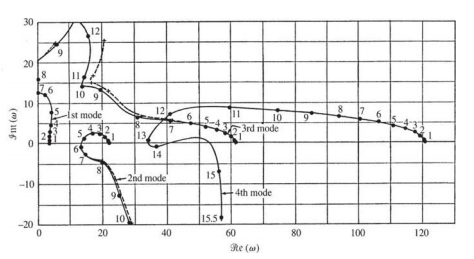

In [11]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/MorganDemenois/Pipe-conveying-fluid/main/Images/beta0.2.PNG")